## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Practice Skills

Binary classification
Python and R basics

In [1]:
killedSum = 1502
passengerSum = 2224
killedRatio = float(killedSum) / passengerSum
print('Survived: ', 1-killedRatio, '%')
print('Died: ', killedRatio, '%')

Survived:  0.32464028776978415 %
Died:  0.6753597122302158 %


## Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

### Metric

Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

### Submission File Format

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)
PassengerId,Survived
 892,0
 893,1
 894,0
 Etc.

# Machine Learning from Start to Finish with Scikit-Learn

This notebook covers the basic Machine Learning process in Python step-by-step. Go from raw data to at least 78% accuracy on the Titanic Survivors dataset. 

### Steps Covered


1. Importing  a DataFrame
2. Visualize the Data
3. Cleanup and Transform the Data
4. Encode the Data
5. Split Training and Test Sets
6. Fine Tune Algorithms
7. Cross Validate with KFold
8. Upload to Kaggle

In [2]:
# data analysis and wrangling
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# utils
import math
import pylab as P

# machine learning
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Aquire data

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

### Analyze by describing data

**Which features are available in the dataset?**

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Data Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**Which features are categorical?**

Categorical - dont have a measurement unit (nominal|ordinal|ratio|interval based)

nominal: 'Survived', 'Sex', 'Embarked' (data values was nominated - given name like survived or not are 0 & 1)

ordinal: 'Pclass' (data values having some order, series, or series based)


Numerical -> Non- categorical -> have a measurement unit (discrete, continous, timeseries based)

discrete: 'SibSp' 'Parch'

continous: 'Age', 'Fare' 


Mixed -> Alphanumerical -> 'Cabin', 'Ticket'

Missing from analyze

'Name'

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Which features might contain errors?**
Name might contain errors because it's free text and people tend to describe people and many naunces
Cabin - some values are NaN
Age - some cases of missing NaN
SibSp & Parch - might have missing values?
Ticket - some values have variations mixed alphanumeric or simple numeric might be an error

In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S


In [8]:
test_df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
240,1132,1,"Lindstrom, Mrs. Carl Johan (Sigrid Posse)",female,55.0,0,0,112377,27.7208,NaN,C
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
248,1140,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,26707,26.0000,NaN,S
355,1247,1,"Julian, Mr. Henry Forbes",male,50.0,0,0,113044,26.0000,E60,S
367,1259,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S
237,1129,3,"Baccos, Mr. Raffull",male,20.0,0,0,2679,7.2250,NaN,C
246,1138,2,"Karnes, Mrs. J Frank (Claire Bennett)",female,22.0,0,0,F.C.C. 13534,21.0000,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
331,1223,1,"Dulles, Mr. William Crothers",male,39.0,0,0,PC 17580,29.7000,A18,C
376,1268,3,"Kink, Miss. Maria",female,22.0,2,0,315152,8.6625,NaN,S


**Which features contain blank, null or empty values?**

These will require correcting.

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.

Cabin > Age are incomplete in case of test dataset.

Empties can be easily seen using info() function of dataframe & then investigating the count of values of that field compared to the total rows.

Embarked can be seen empty in the info of the dataframe (aswell as age & cabin)

**What are the data types for various features?**

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
print('_'*40)
test_df.info()

________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Investigating the data 
Sample Size

In [11]:
samplesTotal = train_df.shape[0]
print(samplesTotal)

891


Precent of training data of the total passengers

In [12]:
print(samplesTotal/passengerSum, '% of total passangers')

0.4006294964028777 % of total passangers


**What is the distribution of the numeric data?**

In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


At which precentile most people died because 0 = non survived show that 38% of samples survived

In [14]:
train_df.Survived.describe(percentiles=[.60, .61, .62, .63, .64])

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
50%        0.000000
60%        0.000000
61%        0.000000
62%        1.000000
63%        1.000000
64%        1.000000
max        1.000000
Name: Survived, dtype: float64

**Precent of passangers without children or parents**

In [15]:
sum(train_df.Parch==0) / samplesTotal

0.76094276094276092

Ratio of uniques cabins per total cabins

In [16]:
1 - ( 147 / 204 )

0.27941176470588236

Ratio of unique tickets per total passangers

In [17]:
1 - ( 681 / 891 )

0.23569023569023573

At which precentile value change to 1 which indicate how many passanger travelled without children or parent which show that 76% of passangers were without children or parents 

In [18]:
train_df.Parch.describe(percentiles=[.76, .77, .78, .8, .9, .99])

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
50%        0.000000
76%        0.000000
77%        1.000000
78%        1.000000
80%        1.000000
90%        2.000000
99%        4.000000
max        6.000000
Name: Parch, dtype: float64

At which precentile the value changes to 1 which indicate the precent of passangers which had no children or spouse or vice verse which precent did travelled which children or spouse

In [19]:
train_df.SibSp.describe(percentiles=[.68, .69])

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
50%        0.000000
68%        0.000000
69%        1.000000
max        8.000000
Name: SibSp, dtype: float64

Only less the 1% were at the age > 66

In [20]:
train_df.Age.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64

**What is the distribution of the string data?**

In [21]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Olsvigen, Mr. Thor Anderson",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


At this point after collecting & overviewing how the data distribute, we can list our current assumptions about correlating, completing, correcting, creating & classifying the data

Actual brainstroming cross-referencing the data features with each of the listed actions.
We try to answer questions like - Does age fits our model? Should we complete age? should we put effort on that feature or drop it?

## Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.
### Correlating.
We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
### Completing.
We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.
### Correcting.
Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
### Creating.
We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.
### Classifying.
We may also add to our assumptions based on the problem description noted earlier.
Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.

TODO

The problem is a closed one rather then an open problem - the people survived are known, can we let the machine know about it? should we care?
Does cabin have influence of survivability?
Does ticket have influence on survivability?
is fare related to cabin? are they linear? do they say the same thing?
How the concept of family should be eng. from the data as new field


## Analyzing by pivoting features

In [22]:
alignmentColumn = 'Survived'

def pivotBySurvived(featureName):
    return train_df[[featureName,alignmentColumn]].groupby([featureName], as_index=False).mean().sort_values(by=alignmentColumn, ascending=False)

In [23]:
pivotBySurvived('Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [24]:
pivotBySurvived('Sex')

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [25]:
pivotBySurvived('SibSp')

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [26]:
pivotBySurvived('Parch')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data

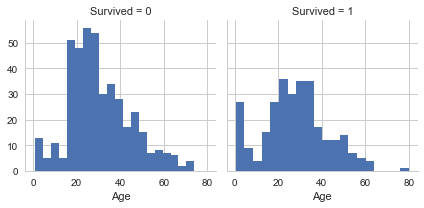

In [27]:
g = sns.FacetGrid(train_df,col=alignmentColumn)
g.map(plt.hist, 'Age', bins=20)

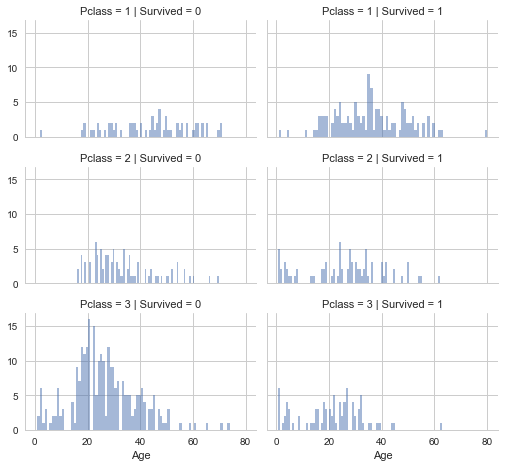

In [28]:
grid = sns.FacetGrid(train_df, col=alignmentColumn, row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=80)
grid.add_legend()

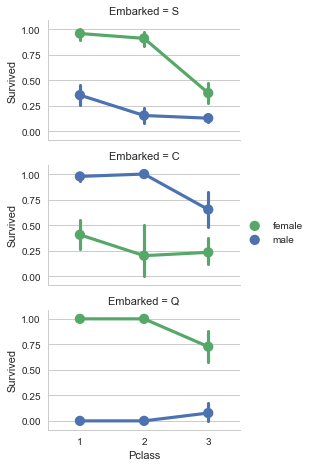

In [29]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

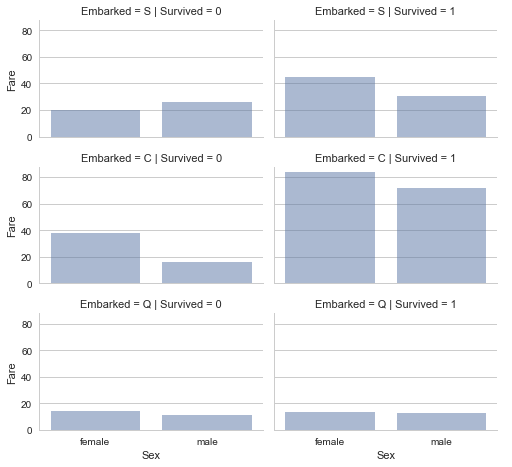

In [30]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

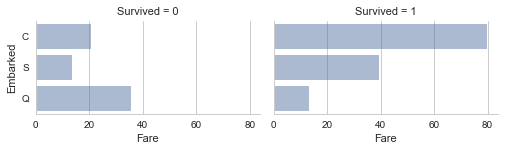

In [31]:
grid = sns.FacetGrid(train_df, col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Fare', 'Embarked', alpha=.5, ci=None)
grid.add_legend()

In [32]:
95/168

0.5654761904761905

In [33]:
441/644

0.6847826086956522

In [34]:
41/77

0.5324675324675324

Having the following columns of data:
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
 
we want to predict if someone survived yes or no - so survived is 100% correlated to the problem and also the output
PassangerId is just a running number and have no correlation to the survavability - can be reduced - do we need it for output? does it matters

**Is Pclass correlated to Survivability?**
* Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
* Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
* Pclass varies in terms of Age distribution of passengers.

1. Consider Pclass for model training.

**Is name correlated to the problem?**

**Is sex correlated to the problem?**
* Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* Female passengers had much better survival rate than males. Confirms classifying (#1).
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

1. Add Sex feature to model training.

**Is age correlated to the problem?**
* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

1. We should consider Age (our assumption classifying #2) in our model training.
2. Complete the Age feature for null values (completing #1).
3. We should band age groups (creating #3).

**Is SibSp correlated to the problem?**
* SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

**Is Parch correlated to the problem?**
* SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

**is Ticket correlated to the problem?**

**Is Fare correlated to the problem?**
* Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.

**Is Cabin correlated to the problem?**

**Is Embarked correlated to the problem?**
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).
* Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

1. Complete and add Embarked feature to model training.













## Wranglin Data
### Correcting by dropping features

In [35]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Cabin', 'Ticket'], axis=1)
test_df = test_df.drop(['Cabin', 'Ticket'], axis=1)
combine = [train_df, test_df]
print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


## Creating a new feature extracting from existing

In [36]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [37]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title','Survived']].groupby('Title', as_index=False).mean().sort_values('Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [38]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [39]:
print('Before', train_df.shape, test_df.shape)
train_df = train_df.drop(['PassengerId','Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
print('After', train_df.shape, test_df.shape)

Before (891, 11) (418, 10)
After (891, 9) (418, 9)


In [40]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male': 0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**Question to self**
Is it good to set a categorical feature to 0?
will 0 not affect the computation in some way?

In [41]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [42]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[ (dataset.Sex == i) & (dataset.Pclass == j+1) ]['Age'].dropna()
            
            #age_mean = guess_fd 
            #age_std = guess_df
            #age_guess = rnd.uniform( age_mean - age_std, age_mean + age_std )
            
            age_guess = guess_df.median()
            
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
            
            
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [43]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 20)
train_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 4]",0.675000
1,"(4, 8]",0.642857
2,"(8, 12]",0.266667
3,"(12, 16]",0.483871
4,"(16, 20]",0.337500
5,"(20, 24]",0.435714
6,"(24, 28]",0.225275
7,"(28, 32]",0.408602
8,"(32, 36]",0.530864
9,"(36, 40]",0.328358


In [44]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 4, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 4) & (dataset['Age'] <= 8), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 12), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 16), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 20), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 24), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 28), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 32), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 36), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 40), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 44), 'Age'] = 10
    dataset.loc[(dataset['Age'] > 44) & (dataset['Age'] <= 48), 'Age'] = 11
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 52), 'Age'] = 12
    dataset.loc[(dataset['Age'] > 52) & (dataset['Age'] <= 56), 'Age'] = 13
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 60), 'Age'] = 14
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 64), 'Age'] = 15
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 68), 'Age'] = 16
    dataset.loc[(dataset['Age'] > 68) & (dataset['Age'] <= 72), 'Age'] = 17
    dataset.loc[(dataset['Age'] > 72) & (dataset['Age'] <= 76), 'Age'] = 18
    dataset.loc[dataset['Age'] > 76, 'Age'] = 19
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,5,1,0,7.2500,S,1,"(20, 24]"
1,1,1,1,9,1,0,71.2833,C,3,"(36, 40]"
2,1,3,1,6,0,0,7.9250,S,2,"(24, 28]"
3,1,1,1,8,1,0,53.1000,S,3,"(32, 36]"
4,0,3,0,8,0,0,8.0500,S,1,"(32, 36]"


In [45]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,5,1,0,7.2500,S,1
1,1,1,1,9,1,0,71.2833,C,3
2,1,3,1,6,0,0,7.9250,S,2
3,1,1,1,8,1,0,53.1000,S,3
4,0,3,0,8,0,0,8.0500,S,1


## Create new feature combining existing features

In [46]:
freq_port = train_df['Embarked'].dropna().mode()[0]
freq_port

'S'

In [47]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


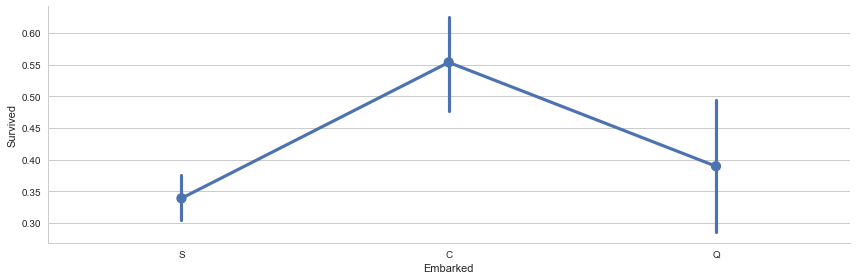

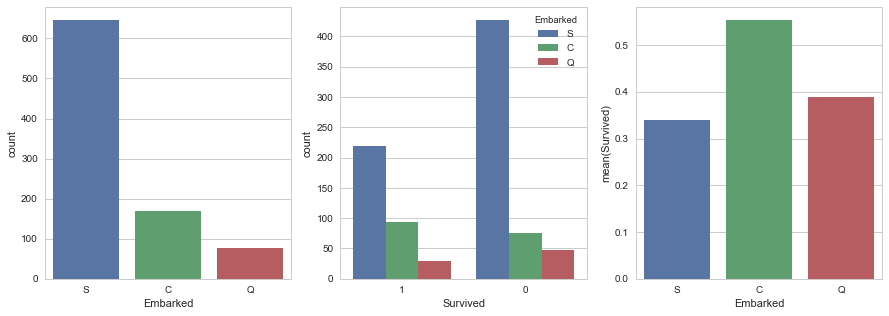

In [59]:
sns.factorplot('Embarked','Survived', data=train_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

#sns.factorplot('Embarked',data=train_df,kind='count',order=['S','C','Q'],ax=axis1)
sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

In [49]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,5,1,0,7.2500,0,1
1,1,1,1,9,1,0,71.2833,1,3
2,1,3,1,6,0,0,7.9250,0,2
3,1,1,1,8,1,0,53.1000,0,3
4,0,3,0,8,0,0,8.0500,0,1


In [50]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,8,0,0,7.8292,2,1
1,893,3,1,11,1,0,7.0000,0,3
2,894,2,0,15,0,0,9.6875,2,1
3,895,3,0,6,0,0,8.6625,0,1
4,896,3,1,5,1,1,12.2875,0,3


In [51]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 10)
train_df[['FareBand','Survived']].groupby('FareBand', as_index=False).mean()

,FareBand,Survived
0,"[0, 7.55]",0.141304
1,"(7.55, 7.854]",0.298851
2,"(7.854, 8.05]",0.179245
3,"(8.05, 10.5]",0.230769
4,"(10.5, 14.454]",0.428571
5,"(14.454, 21.679]",0.420455
6,"(21.679, 27]",0.516854
7,"(27, 39.688]",0.373626
8,"(39.688, 77.958]",0.528090
9,"(77.958, 512.329]",0.758621


In [52]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.55, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.55) & (dataset['Fare'] <= 7.854), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 8.05), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 8.05) & (dataset['Fare'] <= 10.5), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 14.454), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 21.679), 'Fare'] = 5
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 27), 'Fare'] = 6
    dataset.loc[(dataset['Fare'] > 27) & (dataset['Fare'] <= 39.688), 'Fare'] = 7
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 77.958), 'Fare'] = 8
    dataset.loc[(dataset['Fare'] > 77.958), 'Fare'] = 9
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,5,1,0,0,0,1
1,1,1,1,9,1,0,8,1,3
2,1,3,1,6,0,0,2,0,2
3,1,1,1,8,1,0,8,0,3
4,0,3,0,8,0,0,2,0,1
5,0,3,0,6,0,0,3,2,1
6,0,1,0,13,0,0,8,0,1
7,0,3,0,0,3,1,5,0,4
8,1,3,1,6,0,2,4,0,3
9,1,2,1,3,1,0,7,1,3


## Model, predict and solve

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

In [54]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [56]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

81.590000000000003

In [57]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.176126
7,Title,0.479009
6,Embarked,0.213798
5,Fare,0.138099
2,Age,-0.170254
4,Parch,-0.271077
3,SibSp,-0.528255
0,Pclass,-0.844199


In [59]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

85.629999999999995

In [60]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

87.879999999999995

In [61]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

79.799999999999997

In [62]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

80.810000000000002

In [63]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

81.260000000000005

In [64]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

81.819999999999993

In [65]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.709999999999994

In [66]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

93.709999999999994

In [67]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,93.71
8,Decision Tree,93.71
1,KNN,87.88
0,Support Vector Machines,85.63
6,Stochastic Gradient Decent,81.82
2,Logistic Regression,81.59
7,Linear SVC,81.26
5,Perceptron,80.81
4,Naive Bayes,79.80


In [68]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

In [69]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [74]:
my_data = np.array([[5, 'a', 1],
                    [3, 'b', 3],
                    [1, 'b', 2],
                    [3, 'a', 1],
                    [4, 'b', 2],
                    [7, 'c', 1],
                    [7, 'c', 1]])                


df = pd.DataFrame(data=my_data, columns=['y', 'dummy', 'x'])
just_dummies = pd.get_dummies(df['dummy'])
step_1 = pd.concat([df, just_dummies], axis=1)      
print(step_1)

step_1.drop(['dummy', 'c'], inplace=True, axis=1)
print(step_1)

# to run the regression we want to get rid of the strings 'a', 'b', 'c' (obviously)
# and we want to get rid of one dummy variable to avoid the dummy variable trap
# arbitrarily chose "c", coefficients on "a" an "b" would show effect of "a" and "b"
# relative to "c"
step_1 = step_1.applymap(np.int) 
print(step_1)


##result = sm.OLS(step_1['y'], sm.add_constant(step_1[['x', 'a', 'b']])).fit()
##print result.summary()

   y dummy  x  a  b  c
0  5     a  1  1  0  0
1  3     b  3  0  1  0
2  1     b  2  0  1  0
3  3     a  1  1  0  0
4  4     b  2  0  1  0
5  7     c  1  0  0  1
6  7     c  1  0  0  1
   y  x  a  b
0  5  1  1  0
1  3  3  0  1
2  1  2  0  1
3  3  1  1  0
4  4  2  0  1
5  7  1  0  0
6  7  1  0  0
   y  x  a  b
0  5  1  1  0
1  3  3  0  1
2  1  2  0  1
3  3  1  1  0
4  4  2  0  1
5  7  1  0  0
6  7  1  0  0
